# Generative AI App Builder & Enterprise Search

_Using Google Cloud Enterprise Search, PaLM and Langchain_
  
---

### What is Enterprise Search?

[Enterprise Search](https://cloud.google.com/enterprise-search) is a part of the Generative AI App Builder suite of tools offered by Google Cloud.

Gen AI App Builder lets developers, even those with limited machine learning skills, quickly and easily tap into the power of Google’s foundation models, search expertise, and conversational AI technologies to create enterprise-grade generative AI applications.
Enterprise Search lets organizations quickly build generative AI powered search engines for customers and employees. The solution is provided within the Google Cloud UI and also via API for integration with enterprise workflows or large language models.

### Using Enterprise Search

Enterprise Search is currently available on an allowlist basis (customers need to be approved for access) as of June 6, 2023. If you would like early access to the product, please reach out to your account team.


Once you have been granted access, upload data in the form of documents, web sites or relational databases and then users can retrieve the most relevant document chunks using natural language queries. The API is provided with specific configuration options which are designed to work well in conjunction with LLMs, such as such as choosing different document chunk types.

### Combining Enterprise Search with LLMs

As LLMs continue to explode in power and popularity, it has become increasingly clear that tools for information retrieval are an essential part of the stack to unlock many of Gen AI's most valuable use cases.
These retrieval tools allow you to efficiently fetch information from your own data and insert the most relevant extracts directly into LLM prompts. This allows you to ground Generative AI output in data that you know to be relevant, validated and up to date.

Most approaches to retrieval typically require the creation of embeddings from documents and the set up of a vector search engine. Custom solutions such as these are time consuming and complex to create, maintain and host. In contrast, Enterprise Search is a turnkey search engine which provides Google-quality results as a managed service.

<table align="left">

  <td>
    <a href="https://colab.research.google.com/github/HSbedi87/vertexai-llm-notebooks/blob/main/enterprise_search_lab.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/HSbedi87/vertexai-llm-notebooks/enterprise_search_lab.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/HSbedi87/vertexai-llm-notebooks/blob/main/enterprise_search_lab.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      Open in Vertex AI Workbench
    </a>
  </td>
</table>

## What we will cover in this workshop?
1. Create a new Enterprise search App.
2. Query Search App in console.
3. Query data using Python client library.
4. Combine ES with  VertexAI palm.

---

### 1.Create a new Enterprise search App.
For this workshop we will create three Search apps,  using **unstructured data**(Pdfs),structured data(json) & public website data.

1. In the Google Cloud console, go to the Gen App Builder page.
2. Read and agree to the Terms of Service, then click Continue and activate the API.
3. Click New app.
4. On the Create your new app page, make sure Search is selected.
5. Click Continue.
6. On the Create a data store for your app page, click Unstructured data, and then click Create.
7. Click Cloud Storage (without metadata).
8. In the Import data from Cloud Storage pane, enter the following value: gs://cloud-samples-data/gen-app-builder/search/alphabet-investor-pdfs. This Cloud Storage bucket contains earnings report PDFs from the Alphabet investor site.
9. Click Import. Import completed displays in the Status column when the import process is complete. For this dataset, this typically takes about a minute. You might need to click Refresh to see Import completed.
10. In the navigation menu, click Preview to test the search app.
11. In the search bar, enter Google, and then press Enter to view your results.


To create an **structured data** search app

Follow steps up to 5 above
6. On the Create a data store for your app page, click Structured data, and then click Create.
7. Click Cloud Storage.
8. In the Import data from Cloud Storage pane, enter the following value:gs://cloud-samples-data/gen-app-builder/search/kaggle_movies
9. Click Import. Import completed displays in the Status column when the import process is complete. For this dataset, this typically takes two to three minutes. You might need to click Refresh to see Import completed.
10. Click the Documents tab to see the number of documents imported.
11. In the navigation menu, click Preview to test the search app.
12. In the search bar, enter Harry Potter, and then press Enter to get results about the Harry Potter series of movies.

To create an **public website** based search app

Follow steps up to 5 above
6. On the Create a data store for your app page, click website, and then click Create.
7. Add cloud.google.com/vertex-ai/docs* and click save.
8. In the navigation menu, click Preview to test the search app.
9. In the search bar, enter prebuilt pytorch inference containers, and then press Enter to get results that point to the relevant documentation pages.

In [2]:
 # install required packages. Restart runtime if using colab.
!pip install google-cloud-aiplatform langchain google-cloud-discoveryengine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.8/431.8 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.3/321.3 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1


### Authenticate

If running in Colab authenticate with `google.colab.google.auth` otherwise assume that running on Vertex Workbench.

In [1]:
import os
import sys

if "google.colab" in sys.modules:
    from google.colab import auth as google_auth

    google_auth.authenticate_user()

### Set the following constants to reflect your environment
* The queries used in the examples here relate to a GCS bucket containing Alphabet investor PDFs, but these should be customised to your own data.

In [3]:
PROJECT_ID = ""  # @param {type:"string"}
SEARCH_ENGINE_ID = ""  # @param {type:"string"}
REGION = "us-central1"  # @param {type:"string"}
MODEL = "text-bison@001"
LOCATION_ID = "global"

In [4]:
from google.cloud import discoveryengine_v1beta
from google.cloud.discoveryengine_v1beta.services.search_service import pagers
def get_relevant_documents(query: str) -> pagers.SearchPager:
    """Get documents relevant for a query."""


    client = discoveryengine_v1beta.SearchServiceClient()
    content_search_spec = {
              "snippet_spec": {
                  "max_snippet_count": 3,
              }
          }
    serving_config = client.serving_config_path(
                project=PROJECT_ID,
                location=LOCATION_ID,
                data_store=SEARCH_ENGINE_ID,
                serving_config="default_config",
            )

    request = discoveryengine_v1beta.SearchRequest(
        query=query,
        serving_config=serving_config,
        content_search_spec=content_search_spec,
    )
    response = client.search(request)

    return convert_search_response(response)

def convert_search_response(
    search_results: pagers.SearchPager):
    """Converts search response to a list"""
    documents = []
    for result in search_results:
        if hasattr(result.document, "derived_struct_data"):
            doc_data = result.document.derived_struct_data
            for snippet in doc_data.get("snippets", []):
                page_content = snippet.get("snippet", "")
                metadata = {
                            "source": f"{doc_data.get('link', '')}",
                            "page_number": f"{snippet.get('pageNumber', '')}",
                            "id": result.document.id,
                        }
                documents.append({"page_content": page_content,"metadata": metadata,})
    return documents

In [5]:
!gsutil ls gs://cloud-samples-data/gen-app-builder/search/alphabet-investor-pdfs | wc -l

173


In [6]:
resp = get_relevant_documents("what was Alphabet's 2022Q4 revenue")
resp[0:5]

[{'page_content': '<b>Alphabet</b> Announces Fourth Quarter and Fiscal Year 2019 <b>Results</b> MOUNTAIN VIEW, Calif. – February 3, 2020 – <b>Alphabet</b> Inc. (NASDAQ: GOOG, GOOGL) today&nbsp;...',
  'metadata': {'source': 'gs://cloud-samples-data/gen-app-builder/search/alphabet-investor-pdfs/2019Q4_alphabet_earnings_release.pdf',
   'page_number': '',
   'id': 'f462b372d2067eea24a4d38c436bfabb'}},
 {'page_content': '<b>Alphabet</b> Announces Fourth Quarter and Fiscal Year 2020 <b>Results</b> MOUNTAIN VIEW, Calif. – February 2, 2021 – <b>Alphabet</b> Inc. (NASDAQ: GOOG&nbsp;...',
  'metadata': {'source': 'gs://cloud-samples-data/gen-app-builder/search/alphabet-investor-pdfs/2020Q4_alphabet_earnings_release.pdf',
   'page_number': '',
   'id': '217e8bedecfe08e3c43f5b289af15243'}},
 {'page_content': '<b>Alphabet</b> Announces Fourth Quarter and Fiscal Year 2022 <b>Results</b> MOUNTAIN VIEW, Calif. – February 2, 2023 – <b>Alphabet</b> Inc. (NASDAQ: GOOG, GOOGL) today&nbsp;...',
  'metada

In [10]:
# query = "Was revenue for APAC greater than EMEA in 2022"
# query = "Did Covid19 impact revenue in 2020"
query = "What was Google cloud's 2022 Q1 revenue?"
resp = get_relevant_documents(query)
resp[0:5]

[{'page_content': '... <b>Google Cloud Google Cloud revenues</b> increased $7.1 billion from 2021 to <b>2022</b>. ... <b>Google Cloud&#39;s</b> infrastructure and platform services were the largest&nbsp;...',
  'metadata': {'source': 'gs://cloud-samples-data/gen-app-builder/search/alphabet-investor-pdfs/2022_alphabet_annual_report.pdf',
   'page_number': '',
   'id': '276cee4c4086600303bc561483691f9a'}},
 {'page_content': '<b>Google Cloud Google Cloud revenues</b> increased $1.6 billion from the three months ended March 31, <b>2022</b> to the three months ended March 31, 2023.',
  'metadata': {'source': 'gs://cloud-samples-data/gen-app-builder/search/alphabet-investor-pdfs/20230426_alphabet_10Q.pdf',
   'page_number': '',
   'id': '4ece8d920ecf408b6f4ba4b05a25af33'}},
 {'page_content': '... 2021 <b>2022 Revenues</b>: Google Services $ 51,178 $ 61,472 <b>Google Cloud</b> 4,047 5,821 Other Bets 198 440 Hedging gains (losses) (109) 278 Total <b>revenues</b>&nbsp;...',
  'metadata': {'sour

### [RetrievalQA chain](https://python.langchain.com/docs/modules/chains/popular/vector_db_qa)

This is the simplest document Q&A chain offered by langchain.

There are several different chain types available, listed [here](https://docs.langchain.com/docs/components/chains/index_related_chains).
* In these examples we use the `stuff` type, which simply inserts all of the document chunks into the prompt.
* This has the advantage of only making a single LLM call, which is faster and more cost efficient
* However, if we have a large number of search results we run the risk of exceeding the token limit in our prompt, or truncating useful information.
* Other chain types such as `map_reduce` and `refine` use an iterative process which makes multiple LLM calls, taking individual document chunks at a time and refining the answer iteratively.

## High Level Flow

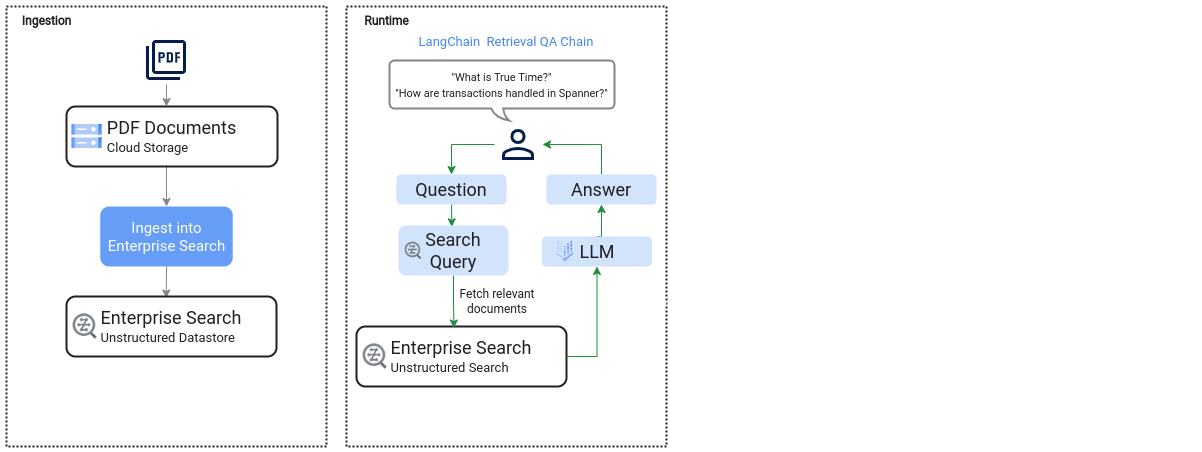

In [11]:
#@title Wrapper around Google Cloud Enterprise Search

from __future__ import annotations

from typing import Any, Dict, List

from google.cloud import discoveryengine_v1beta
from google.cloud.discoveryengine_v1beta.services.search_service import pagers
from langchain.schema import BaseRetriever, Document
from langchain.utils import get_from_dict_or_env
from pydantic import BaseModel, Extra, root_validator


class EnterpriseSearchRetriever(BaseRetriever, BaseModel):
    """Wrapper around Google Cloud Enterprise Search."""

    client: Any = None  #: :meta private:
    serving_config: Any = None  #: :meta private:Any
    content_search_spec: Any = None  #: :meta private:Any
    project_id: str = ""
    search_engine_id: str = ""
    serving_config_id: str = "default_config"
    location_id: str = "global"
    max_snippet_count: int = 3
    credentials: Any = None
    "The default custom credentials (google.auth.credentials.Credentials) to use "
    "when making API calls. If not provided, credentials will be ascertained from "
    "the environment."

    class Config:
        """Configuration for this pydantic object."""

        extra = Extra.forbid
        arbitrary_types_allowed = True

    @root_validator()
    def validate_environment(cls, values: Dict) -> Dict:
        try:
            from google.cloud import discoveryengine_v1beta
        except ImportError:
            raise ImportError(
                "google.cloud.discoveryengine is not installed. "
                "Please install it with pip install google-cloud-discoveryengine"
            )

        project_id = get_from_dict_or_env(values, "project_id", "PROJECT_ID")
        values["project_id"] = project_id
        search_engine_id = get_from_dict_or_env(
            values, "search_engine_id", "SEARCH_ENGINE_ID"
        )
        values["search_engine_id"] = search_engine_id
        location_id = get_from_dict_or_env(values, "location_id", "LOCATION_ID")
        values["location_id"] = location_id
        max_snippet_count = get_from_dict_or_env(
            values, "max_snippet_count", "MAX_SNIPPET_COUNT"
        )
        values["max_snippet_count"] = max_snippet_count

        client = discoveryengine_v1beta.SearchServiceClient(
            credentials=values["credentials"]
        )
        values["client"] = client

        serving_config = client.serving_config_path(
            project=project_id,
            location=location_id,
            data_store=search_engine_id,
            serving_config=values["serving_config_id"],
        )
        values["serving_config"] = serving_config

        content_search_spec = {
            "snippet_spec": {
                "max_snippet_count": max_snippet_count,
            }
        }
        values["content_search_spec"] = content_search_spec

        return values

    def _convert_search_response(
        self, search_results: pagers.SearchPager
    ) -> List[Document]:
        """Converts search response to a list of LangChain documents."""
        documents = []
        for result in search_results:
            if hasattr(result.document, "derived_struct_data"):
                doc_data = result.document.derived_struct_data
                for snippet in doc_data.get("snippets", []):
                    documents.append(
                        Document(
                            page_content=snippet.get("snippet", ""),
                            metadata={
                                "source": f"{doc_data.get('link', '')}:{snippet.get('pageNumber', '')}",
                                "id": result.document.id,
                            },
                        )
                    )
        return documents

    def get_relevant_documents(self, query: str) -> List[Document]:
        """Get documents relevant for a query."""
        request = discoveryengine_v1beta.SearchRequest(
            query=query,
            serving_config=self.serving_config,
            content_search_spec=self.content_search_spec,
        )
        response = self.client.search(request)
        documents = self._convert_search_response(response.results)

        return documents

    async def aget_relevant_documents(self, query: str) -> List[Document]:
        raise NotImplementedError("Async interface to GDELT not implemented")

In [13]:
from google.cloud.aiplatform.models import Model
from langchain.chains import RetrievalQA
from langchain.llms import VertexAI
import vertexai

vertexai.init(project=PROJECT_ID, location=REGION)
llm = VertexAI(model_name=MODEL)

retriever = EnterpriseSearchRetriever(
    project_id=PROJECT_ID, search_engine_id=SEARCH_ENGINE_ID
)

search_query = "Were 2021 US revenues higher than 2021 EMEA revenues?"

retrieval_qa = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=retriever
)
retrieval_qa.run(search_query)

'Yes, 2021 US revenues were higher than 2021 EMEA revenues.'

#### Inspecting the process

If we add `return_source_documents=True` we can inspect the document chunks that were returned by the retriever.

This is helpful for debugging, as these chunks may not always be relevant to the answer, or their relevance might not be obvious.

In [ ]:
retrieval_qa = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=retriever, return_source_documents=True
)

results = retrieval_qa({"query": search_query})

print("*" * 79)
print(results["result"])
print("*" * 79)
for doc in results["source_documents"]:
    print("-" * 79)
    print(doc.page_content)

*******************************************************************************
Yes, 2020 EMEA revenues were higher than 2020 APAC revenues.
*******************************************************************************
-------------------------------------------------------------------------------
... 9 % <b>EMEA</b> constant currency <b>revenue</b> percentage change 19 % 9 % <b>APAC revenues</b> ... <b>EMEA revenue</b> percentage change from 2019 to <b>2020 was</b> not significantly&nbsp;...
-------------------------------------------------------------------------------
... September 30, 2019 <b>2020</b> 2019 <b>2020 EMEA revenues</b> $ 12,565 $ 13,924 ... 12 % 4 % <b>EMEA</b> constant currency <b>revenue</b> percentage change 19 % 9 % 19 % 5 % <b>APAC</b>&nbsp;...
-------------------------------------------------------------------------------
... unaudited): Three Months Ended March 31, 2019 <b>2020 EMEA revenues</b> $ 11,668 ... 10 % <b>EMEA</b> constant currency <b>revenue</b> gr